<a href="https://colab.research.google.com/github/nupatige/Templates_Machine-learning/blob/main/01_EDA_%26_Preprocessing_%26_Transformation_%26_Train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading the file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Either specify path of place the csv in same directory & specify name
data = pd.read_csv('/content/drive/MyDrive/Datasets/Templates/Advertising.csv')  

In [ ]:
# Reads the head of the data
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# Reads the tail of the data
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
# Reads the random sample of the data
data.sample(5)

,TV,Radio,Newspaper,Sales
21,237.4,5.1,23.5,12.5
70,199.1,30.6,38.7,18.3
26,142.9,29.3,12.6,15.0
106,25.0,11.0,29.7,7.2
42,293.6,27.7,1.8,20.7


## Information of the data

In [ ]:
# Count of number or rows & columns
data.shape

(200, 4)

In [ ]:
# How to see all the columns
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
# how to describe the data
data.describe()  # "include = 'all' " will give information of categorical & numerical data both

# It provides the five point summary along with the mean & standard deviation

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Checking null values

In [ ]:
# Method - 1
data.notnull().count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [ ]:
# Method - 2
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# Method - 3
data.apply(lambda x: x.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# Impute the null values
# Impute the nan values by the mean of the particular column

from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
# Should use "mean" if it is normally distributed & if not then "median"
miss_mean_imputer = miss_mean_imputer.fit(data)
imputed_data = miss_mean_imputer.transform(data.values)
pd.DataFrame(imputed_data, columns = ['TV', 'Radio', 'Newspaper', 'Sales'])

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Zero Variance check

In [ ]:
# Zero Variance check 
# - Check for columns with 1 unique values. If found then drop those columns.
# - Check if the numerical columns have less unique values. If found then drop those columns.

print(data.nunique())

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64


## Duplicate values

In [ ]:
# Duplicate data
# - Check if any data contains duplicated rows.

dups = data.duplicated()
# # report if there are any duplicates
print(dups.any())

False


## Correlation check

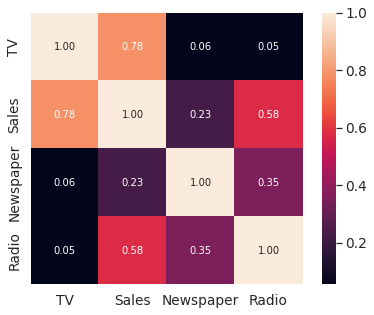

In [ ]:
# heat map for correlation check

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize = (7,5)) # Choose size depening on the required figure size
corrmat = data.corr()
k = 4 # number of varialbes for heat map
cols = corrmat.nlargest(k, 'TV')['TV'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)

## Function to remove highly correlated columns

In [ ]:
# Run the correlation matrix and drop the high correlated columns
# - Function to find the correlated columns and drop from the data set.

def drop_correlated(dataset):
    import numpy as np
    import pandas as pd
    
    try:
        # Read the data set. Considering it as a csv file as input.
        df = pd.read_csv(dataset) 
        
        # Create a correlation matrix and turn to absolute values
        corrmat = df.corr().abs() 
        
        # Selection of the upper traingle from correlation matrix.Used the condition of one array matrix with boolean check.
        up_tri = corrmat.where(np.triu(np.ones(corrmat.shape),k=1).astype(np.bool)) 
        
        # list of columns with high correlation > 0.75. List comprehension by condition
        todrop = [col for col in up_tri.columns if any(up_tri[col] > 0.75)]   
        
        # drop the columns with high correlation 
        df1 = df.drop(todrop, axis=1)  
        
        # output dataset with dropped columns of high correlation. For next steps of model building.
        return df1  
    
    except:
        print('The data entered is not correct. Please follow the below format')
        print("drop_correlated('dataset.csv')")
        

In [ ]:
print('Shape before')
print(data.shape)
data_new = drop_correlated('/content/drive/MyDrive/Datasets/Templates/Advertising.csv')
print('Shape after')
print(data_new.shape)

Shape before
(200, 4)
Shape after
(200, 3)


## Checking outliers

In [ ]:
#Finding Outliers
#IQR Method

import numpy as np

def Outlier_detection(var):
    Q1, Q3 = np.percentile(var, [25,75])
    IQR = Q3-Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    out = [var for var in var if (var > upper_bound) or (var < lower_bound)]
    
    #return np.where((var > upper_bound) | (var < lower_bound))
    return out

data_array_1 = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, -18,1, 1, 2]
Outlier_detection(data_array_1)

[15, -18]

In [ ]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

# num=num.apply(lambda x : outlier_cap(x))

In [ ]:
#Finding Outliers
#Z-Score Method

import numpy as np
data_array_2 = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2] 
mean = np.mean(data_array_2) 
std = np.std(data_array_2)

print('mean of the dataset is', mean) 
print('std. deviation is', std) 

threshold = 3
outlier = [] 
for i in data_array_2: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

mean of the dataset is 2.6666666666666665
std. deviation is 3.3598941782277745
outlier in dataset is [15]


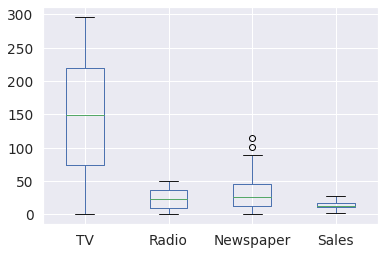

In [ ]:
# Box plot to find outliers

import pandas as pd
import numpy as np

data.plot.box()

## Data visualization of data by exploratory data analysis

In [ ]:
## Add data as & when found

## Data preprocessing (Label encoding or One hot encoding)

In [ ]:
# Data preprocessing to be done only if there are any categorical varaibles

# Function for label encoding

from sklearn import preprocessing
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    # Specify all the categorical columns to be label encoded
    res_df['TV'] = le.fit_transform(res_df['TV'])
    res_df['Radio'] = le.fit_transform(res_df['Radio'])
    res_df['Newspaper'] = le.fit_transform(res_df['Newspaper'])
    return res_df

# encoded_data = preprocessor(data)  # Outputs the encoded data

## Splitting Input & output Variables (Feature selection)

In [ ]:
# Splitting the columns to input varaibles(independent variables) & output variable(Dependent variable)

x = data.drop('Sales', axis = 1).values
y = data['Sales'].values


# If necessary keep it in any array(.values) depending on the type of algorithm used.

## Data transformation (Standardization or Normaliztion)

In [ ]:
# Standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

mean = np.mean(x, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(x, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)